# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [2]:
loan_data_inputs_train = pd.read_csv('inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('targets_train.csv', index_col = 0, header = None)
loan_data_inputs_test = pd.read_csv('inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('targets_test.csv', index_col = 0, header = None)

C:\Users\DiniDev\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Explore Data

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
515539,515539,63919267,68350067,12000.0,12000.0,12000.0,36 months,12.59,401.97,C,...,0,0,0,1,0,0,0,0,0,0
244649,244649,35073443,37756718,35000.0,35000.0,35000.0,60 months,23.99,1006.68,F,...,0,0,0,1,0,0,0,0,0,0
707530,707530,50626029,54005772,12000.0,12000.0,12000.0,36 months,11.53,395.89,B,...,0,1,0,1,0,0,0,0,0,0
98128,98128,6707836,8310166,10000.0,10000.0,10000.0,60 months,14.33,234.40,C,...,0,0,0,0,0,0,0,0,0,1
836748,836748,39259573,42063303,18000.0,18000.0,18000.0,36 months,7.49,559.83,A,...,0,1,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,1
0,
515539,1
244649,1
707530,1
98128,1
836748,1


In [5]:
loan_data_inputs_train.shape

(684775, 317)

In [6]:
loan_data_targets_train.shape

(684775, 1)

In [7]:
loan_data_inputs_test.shape

(171194, 317)

In [8]:
loan_data_targets_test.shape

(171194, 1)

### Selecting the Features

In [11]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86'
]]

In [12]:
inputs_train_with_ref_cat

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
515539,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
244649,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
707530,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
98128,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
836748,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
365838,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
131932,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
671155,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [14]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
515539,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
244649,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
707530,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
98128,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
836748,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [22]:
reg = LogisticRegression(solver='liblinear',C=10.0, random_state=0)

In [23]:
pd.options.display.max_rows = None

In [24]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\DiniDev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [25]:
reg.intercept_

array([-2.01485522])

In [26]:
reg.coef_

array([[ 1.01304651,  0.89230319,  0.72156335,  0.53920012,  0.36775428,
         0.18017838,  0.11807698,  0.12175618,  0.07451614,  0.09660812,
         0.10174075,  0.06729153,  0.08170968,  0.16408661,  0.12473375,
         0.21116515,  0.27434225,  0.27409946,  0.29185603,  0.3567233 ,
         0.57019948,  0.07922029, -0.00639202,  0.35137975,  0.22326792,
         0.23626182,  0.30643594,  0.11586837,  0.03476467,  0.08628118,
         0.12019139,  0.09279815,  0.0626194 ,  0.13561605,  2.74485204,
         1.16322043,  0.96357462,  0.68564939,  0.48099243,  0.19549401,
        -0.09755474,  1.17746357,  0.68733716,  0.41059585,  0.16154343,
         0.02923627, -0.01846249,  0.0382098 ,  0.07392726,  0.04719565,
         0.08907022,  0.05022974,  0.66620291,  0.50830345,  0.30245238,
         0.80812954,  0.76075211,  0.75722775,  0.75115088,  0.80739704,
         0.79368247,  0.82951453,  0.07786028, -0.05936721, -0.05426076,
        -0.04131076,  0.02948934,  0.04770866,  0.0

In [27]:
reg.predict_proba(inputs_train)

array([[0.00663096, 0.99336904],
       [0.01531784, 0.98468216],
       [0.00737464, 0.99262536],
       ...,
       [0.04785747, 0.95214253],
       [0.00445748, 0.99554252],
       [0.14899885, 0.85100115]])

In [28]:
feature_name = inputs_train.columns.values

In [29]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-2.014855
1,grade:A,1.013047
2,grade:B,0.892303
3,grade:C,0.721563
4,grade:D,0.539200
5,grade:E,0.367754
6,grade:F,0.180178
7,home_ownership:OWN,0.118077
8,home_ownership:MORTGAGE,0.121756
9,addr_state:NM_VA,0.074516


## Build a Logistic Regression Model with P-Values

In [32]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [33]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [34]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

C:\Users\DiniDev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\DiniDev\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.527783
1,grade:A,0.994671
2,grade:B,0.878154
3,grade:C,0.708284
4,grade:D,0.526573
5,grade:E,0.356406
6,grade:F,0.169649
7,home_ownership:OWN,0.118254
8,home_ownership:MORTGAGE,0.121895
9,addr_state:NM_VA,0.072446


In [36]:
p_values = reg.p_values

In [37]:
p_values = np.append(np.nan, np.array(p_values))

In [38]:
summary_table['p_values'] = p_values

In [39]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.527783,NaN
1,grade:A,0.994671,1.090400e-26
2,grade:B,0.878154,8.169264e-43
3,grade:C,0.708284,6.748745e-33
4,grade:D,0.526573,8.979825e-21
5,grade:E,0.356406,1.200325e-12
6,grade:F,0.169649,1.072567e-03
7,home_ownership:OWN,0.118254,1.514146e-08
8,home_ownership:MORTGAGE,0.121895,2.125362e-20
9,addr_state:NM_VA,0.072446,2.993698e-02


In [43]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86'
]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [44]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
515539,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
244649,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
707530,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
98128,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
836748,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [45]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\DiniDev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\DiniDev\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
feature_name = inputs_train.columns.values

In [47]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.554353
1,grade:A,1.000794
2,grade:B,0.874695
3,grade:C,0.703951
4,grade:D,0.522027
5,grade:E,0.352397
6,grade:F,0.165907
7,home_ownership:OWN,0.118239
8,home_ownership:MORTGAGE,0.118367
9,addr_state:NM_VA,0.072396


In [48]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.554353,NaN
1,grade:A,1.000794,3.144838e-27
2,grade:B,0.874695,9.329928e-43
3,grade:C,0.703951,9.411424e-33
4,grade:D,0.522027,1.309833e-20
5,grade:E,0.352397,1.633545e-12
6,grade:F,0.165907,1.303461e-03
7,home_ownership:OWN,0.118239,1.433021e-08
8,home_ownership:MORTGAGE,0.118367,1.721777e-19
9,addr_state:NM_VA,0.072396,3.005148e-02


In [49]:
import pickle

In [50]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# PD Model Validation (Test)

### Out-of-sample validation (test)

In [51]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86'
]]

In [52]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [53]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
204061,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
831518,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
649648,0,0,1,0,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
654074,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
463172,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [54]:
y_hat_test = reg2.model.predict(inputs_test)

In [55]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [56]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [57]:
y_hat_test_proba

array([[0.23312939, 0.76687061],
       [0.00577719, 0.99422281],
       [0.01600032, 0.98399968],
       ...,
       [0.03264381, 0.96735619],
       [0.04364343, 0.95635657],
       [0.00777371, 0.99222629]])

In [58]:
y_hat_test_proba[:][:,1]

array([0.76687061, 0.99422281, 0.98399968, ..., 0.96735619, 0.95635657,
       0.99222629])

In [59]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [60]:
y_hat_test_proba

array([0.76687061, 0.99422281, 0.98399968, ..., 0.96735619, 0.95635657,
       0.99222629])

In [61]:
loan_data_targets_test_temp = loan_data_targets_test

In [62]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [63]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [64]:
df_actual_predicted_probs.shape

(171194, 2)

In [65]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [66]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [67]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
204061,1,0.766871
831518,1,0.994223
649648,1,0.984000
654074,1,0.994216
463172,1,0.995428


### Accuracy and Area under the Curve

In [68]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [69]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,5803,3600
1,27940,133851


In [70]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.033897,0.021029
1,0.163207,0.781867


In [71]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.8157645711882425

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

In [73]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99968095, 0.99968095,
        1.        ]),
 array([0.00000000e+00, 6.18081352e-06, 1.96549870e-03, ...,
        9.99993819e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99910698, 0.99910698, 0.99851194, ..., 0.48037734, 0.47898433,
        0.46411316]))

In [74]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

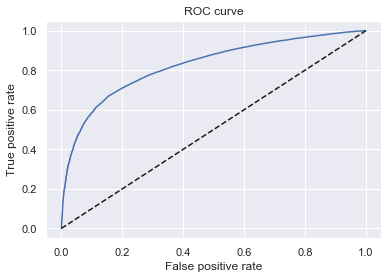

In [76]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [77]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.8248120000527988

### Gini and Kolmogorov-Smirnov

In [78]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [79]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
19408,0,0.464113,0
204311,0,0.475577,0
11162,0,0.478388,0
18711,1,0.478984,0
29579,0,0.480377,0


In [80]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
496058,1,0.998956,1
626186,1,0.998983,1
747046,1,0.998991,1
629000,1,0.999068,1
701306,1,0.999107,1


In [81]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [82]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,19408,0,0.464113,0
1,204311,0,0.475577,0
2,11162,0,0.478388,0
3,18711,1,0.478984,0
4,29579,0,0.480377,0


In [83]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [84]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,19408,0,0.464113,0,1,0,1
1,204311,0,0.475577,0,2,0,2
2,11162,0,0.478388,0,3,0,3
3,18711,1,0.478984,0,4,1,3
4,29579,0,0.480377,0,5,1,4


In [85]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [86]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,19408,0,0.464113,0,1,0,1,0.000006,0.000000,0.000106
1,204311,0,0.475577,0,2,0,2,0.000012,0.000000,0.000213
2,11162,0,0.478388,0,3,0,3,0.000018,0.000000,0.000319
3,18711,1,0.478984,0,4,1,3,0.000023,0.000006,0.000319
4,29579,0,0.480377,0,5,1,4,0.000029,0.000006,0.000425


In [87]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
171189,496058,1,0.998956,1,171190,161787,9403,0.999977,0.999975,1.0
171190,626186,1,0.998983,1,171191,161788,9403,0.999982,0.999981,1.0
171191,747046,1,0.998991,1,171192,161789,9403,0.999988,0.999988,1.0
171192,629000,1,0.999068,1,171193,161790,9403,0.999994,0.999994,1.0
171193,701306,1,0.999107,1,171194,161791,9403,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

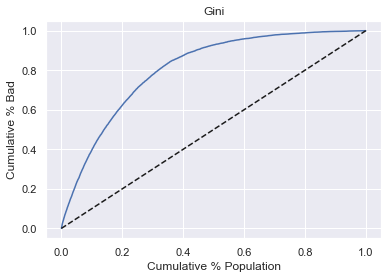

In [88]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [89]:
Gini = AUROC * 2 - 1
Gini

0.6496240001055975

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

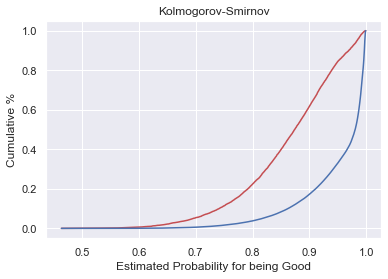

In [90]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [91]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.5145520365546208

# Applying the PD Model

### Calculating PD of individual accounts

In [92]:
pd.options.display.max_columns = None

In [93]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
204061,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
831518,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
649648,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
654074,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
463172,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [94]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.554353,NaN
1,grade:A,1.000794,3.144838e-27
2,grade:B,0.874695,9.329928e-43
3,grade:C,0.703951,9.411424e-33
4,grade:D,0.522027,1.309833e-20
5,grade:E,0.352397,1.633545e-12
6,grade:F,0.165907,1.303461e-03
7,home_ownership:OWN,0.118239,1.433021e-08
8,home_ownership:MORTGAGE,0.118367,1.721777e-19
9,addr_state:NM_VA,0.072396,3.005148e-02


In [95]:
y_hat_test_proba

array([0.76687061, 0.99422281, 0.98399968, ..., 0.96735619, 0.95635657,
       0.99222629])

### Creating a Scorecard

In [96]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.554353,NaN
1,grade:A,1.000794,3.144838e-27
2,grade:B,0.874695,9.329928e-43
3,grade:C,0.703951,9.411424e-33
4,grade:D,0.522027,1.309833e-20
5,grade:E,0.352397,1.633545e-12
6,grade:F,0.165907,1.303461e-03
7,home_ownership:OWN,0.118239,1.433021e-08
8,home_ownership:MORTGAGE,0.118367,1.721777e-19
9,addr_state:NM_VA,0.072396,3.005148e-02


In [97]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [98]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [99]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.554353,NaN
1,1,grade:A,1.000794,3.144838e-27
2,2,grade:B,0.874695,9.329928e-43
3,3,grade:C,0.703951,9.411424e-33
4,4,grade:D,0.522027,1.309833e-20
5,5,grade:E,0.352397,1.633545e-12
6,6,grade:F,0.165907,1.303461e-03
7,7,home_ownership:OWN,0.118239,1.433021e-08
8,8,home_ownership:MORTGAGE,0.118367,1.721777e-19
9,9,addr_state:NM_VA,0.072396,3.005148e-02


In [100]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.554353,NaN,Intercept
1,1,grade:A,1.000794,3.144838e-27,grade
2,2,grade:B,0.874695,9.329928e-43,grade
3,3,grade:C,0.703951,9.411424e-33,grade
4,4,grade:D,0.522027,1.309833e-20,grade
5,5,grade:E,0.352397,1.633545e-12,grade
6,6,grade:F,0.165907,1.303461e-03,grade
7,7,home_ownership:OWN,0.118239,1.433021e-08,home_ownership
8,8,home_ownership:MORTGAGE,0.118367,1.721777e-19,home_ownership
9,9,addr_state:NM_VA,0.072396,3.005148e-02,addr_state


In [101]:
min_score = 300
max_score = 850

In [102]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -0.554353
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.036364
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                -0.275278
int_rate                       0.000000
mths_since_earliest_cr_line   -0.027694
mths_since_issue_d            -0.102150
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.005368
Name: Coefficients, dtype: float64

In [103]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.0012068404931114

In [104]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -0.554353
acc_now_delinq                 0.022042
addr_state                     0.560431
annual_inc                     0.624746
dti                            0.361658
emp_length                     0.135786
grade                          1.000794
home_ownership                 0.118367
initial_list_status            0.117155
inq_last_6mths                 0.095416
int_rate                       1.171411
mths_since_earliest_cr_line    0.062283
mths_since_issue_d             2.740769
mths_since_last_delinq         0.128716
mths_since_last_record         0.330076
purpose                        0.353346
term                           0.037584
verification_status            0.078883
Name: Coefficients, dtype: float64

In [105]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

7.385108395248832

In [106]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.554353,NaN,Intercept,-36.356125
1,1,grade:A,1.000794,3.144838e-27,grade,65.635098
2,2,grade:B,0.874695,9.329928e-43,grade,57.365153
3,3,grade:C,0.703951,9.411424e-33,grade,46.167272
4,4,grade:D,0.522027,1.309833e-20,grade,34.236121
5,5,grade:E,0.352397,1.633545e-12,grade,23.111259
6,6,grade:F,0.165907,1.303461e-03,grade,10.880702
7,7,home_ownership:OWN,0.118239,1.433021e-08,home_ownership,7.754477
8,8,home_ownership:MORTGAGE,0.118367,1.721777e-19,home_ownership,7.762860
9,9,addr_state:NM_VA,0.072396,3.005148e-02,addr_state,4.747955


In [107]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\DiniDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.554353,NaN,Intercept,329.306057
1,1,grade:A,1.000794,3.144838e-27,grade,65.635098
2,2,grade:B,0.874695,9.329928e-43,grade,57.365153
3,3,grade:C,0.703951,9.411424e-33,grade,46.167272
4,4,grade:D,0.522027,1.309833e-20,grade,34.236121
5,5,grade:E,0.352397,1.633545e-12,grade,23.111259
6,6,grade:F,0.165907,1.303461e-03,grade,10.880702
7,7,home_ownership:OWN,0.118239,1.433021e-08,home_ownership,7.754477
8,8,home_ownership:MORTGAGE,0.118367,1.721777e-19,home_ownership,7.762860
9,9,addr_state:NM_VA,0.072396,3.005148e-02,addr_state,4.747955


In [108]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.554353,NaN,Intercept,329.306057,329.0
1,1,grade:A,1.000794,3.144838e-27,grade,65.635098,66.0
2,2,grade:B,0.874695,9.329928e-43,grade,57.365153,57.0
3,3,grade:C,0.703951,9.411424e-33,grade,46.167272,46.0
4,4,grade:D,0.522027,1.309833e-20,grade,34.236121,34.0
5,5,grade:E,0.352397,1.633545e-12,grade,23.111259,23.0
6,6,grade:F,0.165907,1.303461e-03,grade,10.880702,11.0
7,7,home_ownership:OWN,0.118239,1.433021e-08,home_ownership,7.754477,8.0
8,8,home_ownership:MORTGAGE,0.118367,1.721777e-19,home_ownership,7.762860,8.0
9,9,addr_state:NM_VA,0.072396,3.005148e-02,addr_state,4.747955,5.0


In [109]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [110]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

850.0

### One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [111]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-0.554353,NaN,Intercept,329.306057,329.0,-0.306057
1,1,grade:A,1.000794,3.144838e-27,grade,65.635098,66.0,0.364902
2,2,grade:B,0.874695,9.329928e-43,grade,57.365153,57.0,-0.365153
3,3,grade:C,0.703951,9.411424e-33,grade,46.167272,46.0,-0.167272
4,4,grade:D,0.522027,1.309833e-20,grade,34.236121,34.0,-0.236121
5,5,grade:E,0.352397,1.633545e-12,grade,23.111259,23.0,-0.111259
6,6,grade:F,0.165907,1.303461e-03,grade,10.880702,11.0,0.119298
7,7,home_ownership:OWN,0.118239,1.433021e-08,home_ownership,7.754477,8.0,0.245523
8,8,home_ownership:MORTGAGE,0.118367,1.721777e-19,home_ownership,7.762860,8.0,0.237140
9,9,addr_state:NM_VA,0.072396,3.005148e-02,addr_state,4.747955,5.0,0.252045


In [112]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

C:\Users\DiniDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.554353,NaN,Intercept,329.306057,329.0,-0.306057,329.0
1,1,grade:A,1.000794,3.144838e-27,grade,65.635098,66.0,0.364902,66.0
2,2,grade:B,0.874695,9.329928e-43,grade,57.365153,57.0,-0.365153,57.0
3,3,grade:C,0.703951,9.411424e-33,grade,46.167272,46.0,-0.167272,46.0
4,4,grade:D,0.522027,1.309833e-20,grade,34.236121,34.0,-0.236121,34.0
5,5,grade:E,0.352397,1.633545e-12,grade,23.111259,23.0,-0.111259,23.0
6,6,grade:F,0.165907,1.303461e-03,grade,10.880702,11.0,0.119298,11.0
7,7,home_ownership:OWN,0.118239,1.433021e-08,home_ownership,7.754477,8.0,0.245523,8.0
8,8,home_ownership:MORTGAGE,0.118367,1.721777e-19,home_ownership,7.762860,8.0,0.237140,8.0
9,9,addr_state:NM_VA,0.072396,3.005148e-02,addr_state,4.747955,5.0,0.252045,5.0


In [113]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [114]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

858.0

### Caclulating Credit Score

In [115]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
204061,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
831518,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
649648,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
654074,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
463172,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [116]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.554353,NaN,Intercept,329.306057,329.0,-0.306057,329.0
1,1,grade:A,1.000794,3.144838e-27,grade,65.635098,66.0,0.364902,66.0
2,2,grade:B,0.874695,9.329928e-43,grade,57.365153,57.0,-0.365153,57.0
3,3,grade:C,0.703951,9.411424e-33,grade,46.167272,46.0,-0.167272,46.0
4,4,grade:D,0.522027,1.309833e-20,grade,34.236121,34.0,-0.236121,34.0
5,5,grade:E,0.352397,1.633545e-12,grade,23.111259,23.0,-0.111259,23.0
6,6,grade:F,0.165907,1.303461e-03,grade,10.880702,11.0,0.119298,11.0
7,7,home_ownership:OWN,0.118239,1.433021e-08,home_ownership,7.754477,8.0,0.245523,8.0
8,8,home_ownership:MORTGAGE,0.118367,1.721777e-19,home_ownership,7.762860,8.0,0.237140,8.0
9,9,addr_state:NM_VA,0.072396,3.005148e-02,addr_state,4.747955,5.0,0.252045,5.0


In [117]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [118]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [119]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
204061,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
831518,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
649648,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
654074,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
463172,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [120]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [121]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
204061,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
831518,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
649648,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
654074,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
463172,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [122]:
scorecard_scores = df_scorecard['Score - Final']

In [123]:
inputs_test_with_ref_cat_w_intercept.shape

(171194, 101)

In [124]:
scorecard_scores.shape

(101,)

In [127]:
scorecard_scores = scorecard_scores.values.reshape(101, 1)

In [128]:
scorecard_scores.shape

(101, 1)

In [129]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [130]:
y_scores.head()

,0
204061,441.0
831518,703.0
649648,634.0
654074,703.0
463172,718.0


In [131]:
y_scores.tail()

,0
284953,507.0
249719,726.0
333886,586.0
67419,568.0
613396,683.0


### From Credit Score to PD

In [132]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [133]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
204061,0.759281
831518,0.994198
649648,0.983562
654074,0.994198
463172,0.995378


In [134]:
y_hat_test_proba[0: 5]

array([0.76687061, 0.99422281, 0.98399968, 0.99421566, 0.99542847])

In [135]:
df_actual_predicted_probs['y_hat_test_proba'].head()

0    0.464113
1    0.475577
2    0.478388
3    0.478984
4    0.480377
Name: y_hat_test_proba, dtype: float64

### Setting Cut-offs

In [137]:
# We need the confusion matrix again.
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [138]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,5803,3600
1,27940,133851


In [139]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.033897,0.021029
1,0.163207,0.781867


In [140]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.8157645711882425

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score

In [142]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99968095, 0.99968095,
        1.        ]),
 array([0.00000000e+00, 6.18081352e-06, 1.96549870e-03, ...,
        9.99993819e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99910698, 0.99910698, 0.99851194, ..., 0.48037734, 0.47898433,
        0.46411316]))

In [143]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

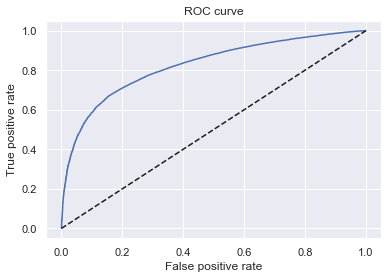

In [145]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [146]:
thresholds

array([1.99910698, 0.99910698, 0.99851194, ..., 0.48037734, 0.47898433,
       0.46411316])

In [147]:
thresholds.shape

(17168,)

In [148]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [149]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [150]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.999107,0.0,0.000000
1,0.999107,0.0,0.000006
2,0.998512,0.0,0.001965
3,0.998511,0.0,0.001978
4,0.998509,0.0,0.002021


In [151]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [152]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [153]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,1766.0
1,0.999107,0.0,0.000006,826.0
2,0.998512,0.0,0.001965,793.0
3,0.998511,0.0,0.001978,792.0
4,0.998509,0.0,0.002021,792.0


In [154]:
df_cutoffs['Score'][0] = max_score

In [155]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,850.0
1,0.999107,0.0,0.000006,826.0
2,0.998512,0.0,0.001965,793.0
3,0.998511,0.0,0.001978,792.0
4,0.998509,0.0,0.002021,792.0


In [156]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17163,0.520739,0.999362,0.999988,371.0
17164,0.517982,0.999362,0.999994,370.0
17165,0.480377,0.999681,0.999994,361.0
17166,0.478984,0.999681,1.000000,360.0
17167,0.464113,1.000000,1.000000,356.0


In [157]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [158]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [159]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.0,0.000000,850.0,0,171194,0.000000,1.000000
1,0.999107,0.0,0.000006,826.0,1,171193,0.000006,0.999994
2,0.998512,0.0,0.001965,793.0,318,170876,0.001858,0.998142
3,0.998511,0.0,0.001978,792.0,320,170874,0.001869,0.998131
4,0.998509,0.0,0.002021,792.0,327,170867,0.001910,0.998090


In [160]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17163,0.520739,0.999362,0.999988,371.0,171186,8,0.999953,0.000047
17164,0.517982,0.999362,0.999994,370.0,171187,7,0.999959,0.000041
17165,0.480377,0.999681,0.999994,361.0,171190,4,0.999977,0.000023
17166,0.478984,0.999681,1.000000,360.0,171191,3,0.999982,0.000018
17167,0.464113,1.000000,1.000000,356.0,171194,0,1.000000,0.000000


In [161]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.932255,0.231416,0.734522,538.0,121015,50179,0.706888,0.293112
5001,0.932255,0.231522,0.734522,538.0,121016,50178,0.706894,0.293106
5002,0.932246,0.231522,0.734559,538.0,121022,50172,0.706929,0.293071
5003,0.932244,0.231628,0.734559,538.0,121023,50171,0.706935,0.293065
5004,0.932219,0.231628,0.734621,538.0,121033,50161,0.706993,0.293007
5005,0.932218,0.231735,0.734621,538.0,121034,50160,0.706999,0.293001
5006,0.932217,0.231735,0.734639,538.0,121037,50157,0.707017,0.292983
5007,0.932216,0.231841,0.734639,538.0,121038,50156,0.707022,0.292978
5008,0.932179,0.231841,0.734794,538.0,121063,50131,0.707168,0.292832
5009,0.932179,0.231947,0.734794,538.0,121064,50130,0.707174,0.292826


In [162]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.988986,0.028182,0.352782,661.0,57342,113852,0.334953,0.665047
1001,0.988951,0.028182,0.353697,660.0,57490,113704,0.335818,0.664182
1002,0.988951,0.028289,0.353697,660.0,57491,113703,0.335824,0.664176
1003,0.988933,0.028289,0.354099,660.0,57556,113638,0.336203,0.663797
1004,0.988933,0.028289,0.354111,660.0,57558,113636,0.336215,0.663785
1005,0.988905,0.028289,0.354791,660.0,57668,113526,0.336858,0.663142
1006,0.988904,0.028289,0.354803,660.0,57670,113524,0.336869,0.663131
1007,0.988859,0.028289,0.355984,660.0,57861,113333,0.337985,0.662015
1008,0.988858,0.028395,0.355984,660.0,57862,113332,0.337991,0.662009
1009,0.988856,0.028395,0.356040,660.0,57871,113323,0.338043,0.661957


In [163]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [164]:
df_scorecard.to_csv('df_scorecard.csv')